In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
import warnings

# Preprocessing

In [6]:
warnings.filterwarnings('ignore')
df = pd.read_csv('D3.csv')

In [7]:
missing_values = df.isna() 
print(missing_values.sum())

race                        1016
gender                         0
age                           10
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
medical_specialty              0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 9
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
insulin                        0
change                         0
diabetesMed                    0
readmitted                     0
dtype: int

In [8]:
df = df.dropna(subset=["race", "chlorpropamide", "age"])

In [9]:
missing_values = df.isna() 
print(missing_values.sum())

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
insulin                     0
change                      0
diabetesMed                 0
readmitted                  0
dtype: int64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50732 entries, 0 to 51765
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      50732 non-null  object
 1   gender                    50732 non-null  object
 2   age                       50732 non-null  object
 3   admission_type_id         50732 non-null  int64 
 4   discharge_disposition_id  50732 non-null  int64 
 5   admission_source_id       50732 non-null  int64 
 6   time_in_hospital          50732 non-null  int64 
 7   medical_specialty         50732 non-null  object
 8   num_lab_procedures        50732 non-null  int64 
 9   num_procedures            50732 non-null  int64 
 10  num_medications           50732 non-null  int64 
 11  number_outpatient         50732 non-null  int64 
 12  number_emergency          50732 non-null  int64 
 13  number_inpatient          50732 non-null  int64 
 14  number_diagnoses      

In [11]:
df['tolbutamide'].unique()

array(['No'], dtype=object)

In [12]:
df['acetohexamide'].unique()

array(['No'], dtype=object)

In [13]:
df.drop(['acetohexamide', 'tolbutamide'], axis=1, inplace=True)
df.drop(['admission_type_id', 'discharge_disposition_id', 'admission_source_id'], axis=1, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50732 entries, 0 to 51765
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   race                50732 non-null  object
 1   gender              50732 non-null  object
 2   age                 50732 non-null  object
 3   time_in_hospital    50732 non-null  int64 
 4   medical_specialty   50732 non-null  object
 5   num_lab_procedures  50732 non-null  int64 
 6   num_procedures      50732 non-null  int64 
 7   num_medications     50732 non-null  int64 
 8   number_outpatient   50732 non-null  int64 
 9   number_emergency    50732 non-null  int64 
 10  number_inpatient    50732 non-null  int64 
 11  number_diagnoses    50732 non-null  int64 
 12  max_glu_serum       50732 non-null  object
 13  A1Cresult           50732 non-null  object
 14  metformin           50732 non-null  object
 15  repaglinide         50732 non-null  object
 16  nateglinide         50

In [15]:
from sklearn.preprocessing import StandardScaler

# mapping
df['age']=df['age'].astype(str)
age_map = {'[80-90)':9, '[70-80)':8, '[50-60)':6, '[40-50)':5, '[60-70)':7, 
'[90-100)':1, '[30-40)':4,'[10-20)':2, '[20-30)':3, '[0-10)':1}
df['age'] = df['age'].map(age_map)
df['readmitted'] = df['readmitted'].astype(bool)

df = pd.get_dummies(df)

y = df['readmitted']
X = df.drop(['readmitted'], axis=1)
X_mat = X.to_numpy()


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50732 entries, 0 to 51765
Columns: 112 entries, age to insulin_Up
dtypes: bool(3), int64(9), uint8(100)
memory usage: 8.9 MB


In [17]:
rs = 10
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

# Data Standardization

In [18]:
# initialise a standard scaler object
scaler = StandardScaler()

# visualise min, max, mean and standard dev of data before scaling
print("Before scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

X_train = scaler.fit_transform(X_train, y_train)

print("After scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

X_test = scaler.transform(X_test)

Before scaling
-------------
Variable #0: min 1, max 9, mean 6.91 and std dev 1.82
Variable #1: min 1, max 14, mean 4.24 and std dev 2.87
Variable #2: min 1, max 121, mean 43.89 and std dev 19.99
Variable #3: min 0, max 6, mean 1.31 and std dev 1.72
Variable #4: min 1, max 75, mean 16.74 and std dev 8.08
After scaling
-------------
Variable #0: min -3.238106030760721, max 1.1483339751280162, mean -0.00 and std dev 1.00
Variable #1: min -1.1297799677610392, max 3.404898958986864, mean -0.00 and std dev 1.00
Variable #2: min -2.1451034047124797, max 3.856792422546743, mean 0.00 and std dev 1.00
Variable #3: min -0.7636830905148733, max 2.728451072550305, mean -0.00 and std dev 1.00
Variable #4: min -1.9486845888843802, max 7.214428458345791, mean -0.00 and std dev 1.00


# Neural Network Model

In [19]:
from sklearn.neural_network import MLPClassifier
warnings.filterwarnings('default')

In [20]:
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


In [21]:
model_1 = MLPClassifier(random_state=rs)
model_1.fit(X_train, y_train)

print("Train accuracy:", model_1.score(X_train, y_train))
print("Test accuracy:", model_1.score(X_test, y_test))

y_pred = model_1.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_1)

Train accuracy: 0.7186021626492454
Test accuracy: 0.6066360052562418
              precision    recall  f1-score   support

       False       0.62      0.67      0.65      8184
        True       0.58      0.53      0.56      7036

    accuracy                           0.61     15220
   macro avg       0.60      0.60      0.60     15220
weighted avg       0.60      0.61      0.60     15220

MLPClassifier(random_state=10)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
model_1.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 10,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [23]:
# max_iter increased to remove warning
model_2 = MLPClassifier(max_iter=700, random_state=rs)
model_2.fit(X_train, y_train)

print("Train accuracy:", model_2.score(X_train, y_train))
print("Test accuracy:", model_2.score(X_test, y_test))

y_pred = model_2.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_2)

Train accuracy: 0.7281763910790718
Test accuracy: 0.5962549277266754
              precision    recall  f1-score   support

       False       0.61      0.68      0.64      8184
        True       0.57      0.50      0.54      7036

    accuracy                           0.60     15220
   macro avg       0.59      0.59      0.59     15220
weighted avg       0.59      0.60      0.59     15220

MLPClassifier(max_iter=700, random_state=10)


In [ ]:
plot_learning_curve(model_2, X_train, y_train)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [51]:
model_2.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 700,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 10,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

# NN with GridSearchCV

In [52]:
print(X_train.shape)

(35512, 111)


In [53]:
params = {'hidden_layer_sizes': [(x,) for x in range(5, 110, 20)]}

cv_1 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
cv_1.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=10), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(5,), (25,), (45,), (65,),
                                                (85,), (105,)]},
             return_train_score=True)

In [54]:
result_set = cv_1.cv_results_
print(result_set)

{'mean_fit_time': array([ 5.2185008 , 17.34865692, 28.77115221, 45.30397711, 51.70365872,
       43.2375948 ]), 'std_fit_time': array([1.51965283, 5.0656353 , 6.55044138, 7.63591278, 3.33820607,
       6.17079236]), 'mean_score_time': array([0.00637896, 0.00707648, 0.0069767 , 0.01255801, 0.02136247,
       0.00388689]), 'std_score_time': array([0.00625882, 0.00435464, 0.00077208, 0.00423305, 0.0172849 ,
       0.00082768]), 'param_hidden_layer_sizes': masked_array(data=[(5,), (25,), (45,), (65,), (85,), (105,)],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'hidden_layer_sizes': (5,)}, {'hidden_layer_sizes': (25,)}, {'hidden_layer_sizes': (45,)}, {'hidden_layer_sizes': (65,)}, {'hidden_layer_sizes': (85,)}, {'hidden_layer_sizes': (105,)}], 'split0_test_score': array([0.64695946, 0.63429054, 0.63175676, 0.62697072, 0.61599099,
       0.60275901]), 'split1_test_score': array([0.63372748, 0.62443694, 0.61007883

Total number of models:  6


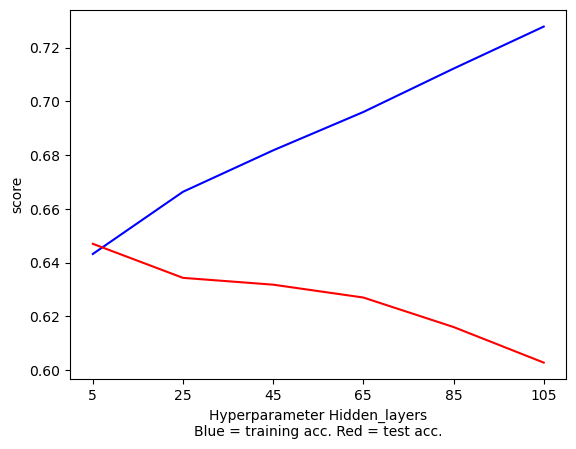

In [55]:
train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))
# plot hidden layers hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter Hidden_layers\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),range(5, 110, 20))
plt.ylabel('score')
plt.show()

Total number of models:  6


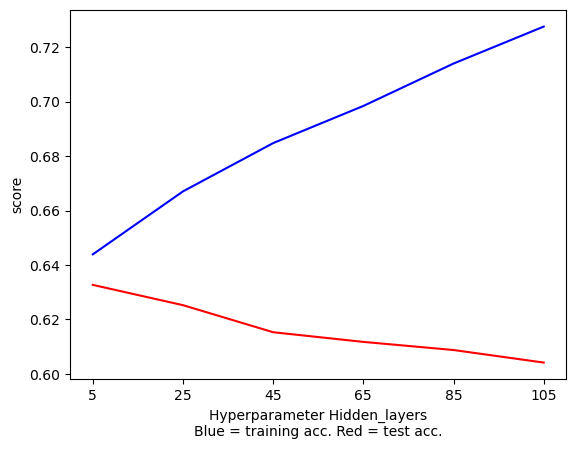

In [56]:
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot hidden layers hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter Hidden_layers\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),range(5, 110, 20))
plt.ylabel('score')
plt.show()

In [57]:
print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

y_pred = cv_1.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_1.best_params_)

Train accuracy: 0.6424588871367425
Test accuracy: 0.635676741130092
              precision    recall  f1-score   support

       False       0.64      0.74      0.69      8184
        True       0.63      0.51      0.56      7036

    accuracy                           0.64     15220
   macro avg       0.63      0.63      0.63     15220
weighted avg       0.64      0.64      0.63     15220

{'hidden_layer_sizes': (5,)}


In [58]:
cv_1_best = cv_1.best_estimator_
print("CV1")
print(cv_1_best.n_iter_)
print(cv_1_best.n_layers_)
print(cv_1_best.out_activation_)
print(cv_1_best.n_features_in_)

CV1
55
3
logistic
111


In [59]:
# new parameters
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,), (11,)]}

cv_2 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_2.fit(X_train, y_train)

print("Train accuracy:", cv_2.score(X_train, y_train))
print("Test accuracy:", cv_2.score(X_test, y_test))

y_pred = cv_2.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_2.best_params_)

Train accuracy: 0.6424588871367425
Test accuracy: 0.635676741130092
              precision    recall  f1-score   support

       False       0.64      0.74      0.69      8184
        True       0.63      0.51      0.56      7036

    accuracy                           0.64     15220
   macro avg       0.63      0.63      0.63     15220
weighted avg       0.64      0.64      0.63     15220

{'hidden_layer_sizes': (5,)}


In [60]:
cv_2_best = cv_2.best_estimator_
print("CV2")
print(cv_2_best.n_iter_)
print(cv_2_best.n_layers_)
print(cv_2_best.out_activation_)
print(cv_2_best.n_features_in_)

CV2
55
3
logistic
111


In [28]:
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv_3 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_3.fit(X_train, y_train)

print("Train accuracy:", cv_3.score(X_train, y_train))
print("Test accuracy:", cv_3.score(X_test, y_test))

y_pred = cv_3.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_3.best_params_)

Train accuracy: 0.6426560036044154
Test accuracy: 0.633508541392904
              precision    recall  f1-score   support

       False       0.64      0.74      0.69      8184
        True       0.63      0.51      0.56      7036

    accuracy                           0.63     15220
   macro avg       0.63      0.62      0.62     15220
weighted avg       0.63      0.63      0.63     15220

{'alpha': 0.001, 'hidden_layer_sizes': (5,)}


In [30]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


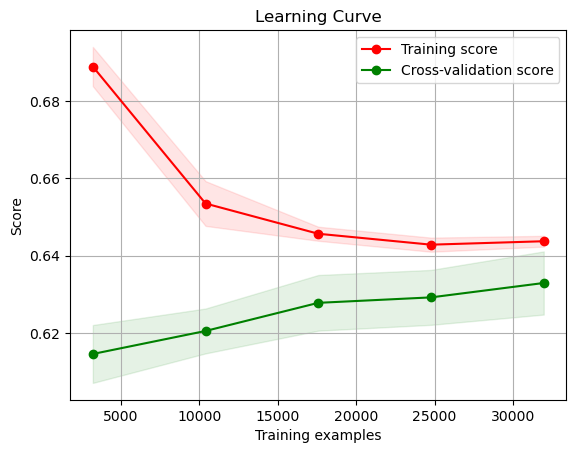

In [31]:
plot_learning_curve(cv_3.best_estimator_, "Learning Curve", X_train, y_train, cv=10)
plt.show()

In [35]:
cv_3_best = cv_3.best_estimator_
print("CV3")
print(cv_3_best.n_iter_)
print(cv_3_best.n_layers_)
print(cv_3_best.out_activation_)
print(cv_3_best.n_features_in_)

CV3
55
3
logistic
111


# Dimensionality reduction

In [36]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(X_train, y_train)

print(rfe.n_features_)

23


In [37]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,), (11,), ], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

rfe_cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
rfe_cv.fit(X_train_rfe, y_train)

print("Train accuracy:", rfe_cv.score(X_train_rfe, y_train))
print("Test accuracy:", rfe_cv.score(X_test_rfe, y_test))

y_pred = rfe_cv.predict(X_test_rfe)
print(classification_report(y_test, y_pred))

print(rfe_cv.best_params_)

Train accuracy: 0.638432079297139
Test accuracy: 0.6352825229960578
              precision    recall  f1-score   support

       False       0.64      0.75      0.69      8184
        True       0.63      0.50      0.56      7036

    accuracy                           0.64     15220
   macro avg       0.64      0.63      0.62     15220
weighted avg       0.64      0.64      0.63     15220

{'alpha': 0.01, 'hidden_layer_sizes': (11,)}


In [38]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


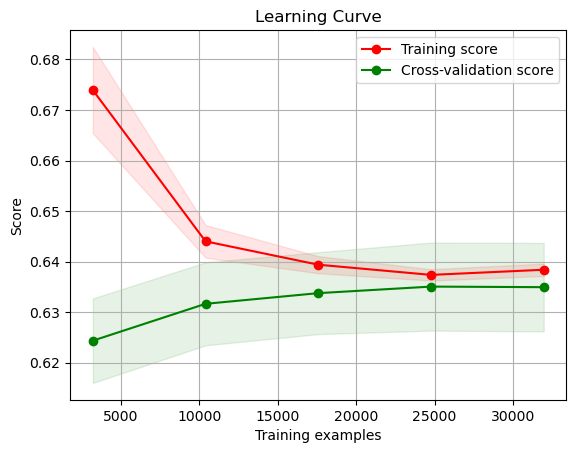

In [39]:
plot_learning_curve(rfe_cv.best_estimator_, "Learning Curve", X_train_rfe, y_train, cv=10)
plt.show()

In [40]:
rfe_cv_best = rfe_cv.best_estimator_
print('Feature selection')
print(rfe_cv_best.n_iter_)
print(rfe_cv_best.n_layers_)
print(rfe_cv_best.out_activation_)
print(rfe_cv_best.n_features_in_)

Feature selection
79
3
logistic
23


In [41]:
# Access the trained neural network model from GridSearchCV
best_model = rfe_cv.best_estimator_

# Get the trained weights of the model's input layer
input_layer_weights = best_model.coefs_[0]

# Calculate the importance of each feature by summing the absolute weights across all neurons in the input layer
feature_importance = np.sum(np.abs(input_layer_weights), axis=0)

# Get the indices that would sort the feature importances in descending order
sorted_indices = np.argsort(feature_importance)[::-1]

# Get the feature names from your X_train_rfe dataset
feature_names = X.columns

# Sort the feature names by importance
sorted_feature_names = feature_names[sorted_indices]

# Now, you can print or analyze the sorted features and their importance
for feature_name in sorted_feature_names:
    print(feature_name)


time_in_hospital
age
diabetesMed
num_lab_procedures
number_inpatient
number_emergency
number_outpatient
change
number_diagnoses
num_medications
num_procedures


In [42]:
# Assuming X_train_rfe is a numpy array
selected_feature_indices = rfe.get_support(indices=True)

# Use the selected indices to get the feature names from the original DataFrame
selected_feature_names = X.columns[selected_feature_indices]

# Convert the selected feature names to a Pandas DataFrame for better display
selected_features_df = pd.DataFrame({'Selected Features': selected_feature_names})

# Print the selected features
print(selected_features_df)


                                    Selected Features
0                                                 age
1                                  num_lab_procedures
2                                      num_procedures
3                                   number_outpatient
4                                    number_emergency
5                                    number_inpatient
6                                    number_diagnoses
7                                         diabetesMed
8                                      race_Caucasian
9                                       race_Hispanic
10                             gender_Unknown/Invalid
11                 medical_specialty_InternalMedicine
12                          medical_specialty_Invalid
13          medical_specialty_ObstetricsandGynecology
14       medical_specialty_Orthopedics-Reconstructive
15                        medical_specialty_Pathology
16                         medical_specialty_Resident
17  medical_specialty_Surger

In [43]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

params = {'hidden_layer_sizes': [(9,), (11,), (13,), (15,) ], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

rfe_cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
rfe_cv.fit(X_train_rfe, y_train)

print("Train accuracy:", rfe_cv.score(X_train_rfe, y_train))
print("Test accuracy:", rfe_cv.score(X_test_rfe, y_test))

y_pred = rfe_cv.predict(X_test_rfe)
print(classification_report(y_test, y_pred))

print(rfe_cv.best_params_)

Train accuracy: 0.638432079297139
Test accuracy: 0.6352825229960578
              precision    recall  f1-score   support

       False       0.64      0.75      0.69      8184
        True       0.63      0.50      0.56      7036

    accuracy                           0.64     15220
   macro avg       0.64      0.63      0.62     15220
weighted avg       0.64      0.64      0.63     15220

{'alpha': 0.01, 'hidden_layer_sizes': (11,)}


In [44]:
iterations_needed = rfe_cv.best_estimator_.n_iter_
print("Iterations needed for training:", iterations_needed)

Iterations needed for training: 79


# NN with Decision Tree

In [45]:
import pickle
with open('DT.pickle', 'rb') as f:
    dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv = pickle.load(f)

print(dt_best.best_params_)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 5}


In [46]:
# analyse feature importance from the tuned decision tree
importances = dt_best.best_estimator_.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)
indices = indices[:20]
for i in indices:
    print(feature_names[i], ':', importances[i])

number_inpatient : 0.6381981338908856
age : 0.07327214295078206
number_emergency : 0.06782710488619006
number_outpatient : 0.04473199817364742
diabetesMed : 0.026753088800269036
number_diagnoses : 0.0265376850020693
num_lab_procedures : 0.026524174597051867
num_medications : 0.021847087608436826
medical_specialty_Invalid : 0.0160967522990542
medical_specialty_InternalMedicine : 0.009895495899597017
insulin_Steady : 0.009318618299450085
num_procedures : 0.008437152889207475
race_Hispanic : 0.005894980006009106
A1Cresult_>8 : 0.005242670552721142
metformin_No : 0.00505123981362141
time_in_hospital : 0.0038341264876989465
metformin_Steady : 0.0030798567405517846
glyburide_Steady : 0.002160177027149097
glyburide_No : 0.0020130733532451118
medical_specialty_Family/GeneralPractice : 0.0020069990513469443


In [47]:
from sklearn.feature_selection import SelectFromModel

selectmodel = SelectFromModel(dt_best.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train)
X_test_sel_model = selectmodel.transform(X_test)

print(X_train_sel_model.shape)

(35512, 11)


In [48]:
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv_sel_model = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_sel_model.fit(X_train_sel_model, y_train)

print("Train accuracy:", cv_sel_model.score(X_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model.score(X_test_sel_model, y_test))

y_pred = cv_sel_model.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

print(cv_sel_model.best_params_)

Train accuracy: 0.6347995043928812
Test accuracy: 0.6340998685939553
              precision    recall  f1-score   support

       False       0.63      0.75      0.69      8184
        True       0.63      0.50      0.56      7036

    accuracy                           0.63     15220
   macro avg       0.63      0.62      0.62     15220
weighted avg       0.63      0.63      0.63     15220

{'alpha': 0.0001, 'hidden_layer_sizes': (9,)}


In [49]:
cv_sel_model_best = cv_sel_model.best_estimator_
print('Decision Tree')
print(cv_sel_model_best.n_iter_)
print(cv_sel_model_best.n_layers_)
print(cv_sel_model_best.out_activation_)
print(cv_sel_model_best.n_features_in_)

Decision Tree
59
3
logistic
11


# Comparison

In [61]:
from sklearn.metrics import roc_auc_score

y_pred_proba_nn_1 = model_1.predict_proba(X_test)
y_pred_proba_nn_2 = model_2.predict_proba(X_test)
y_pred_proba_cv_1 = cv_1.predict_proba(X_test)
y_pred_proba_cv_2 = cv_2.predict_proba(X_test)
y_pred_proba_cv_3 = cv_3.predict_proba(X_test)
y_pred_proba_rfe_cv = rfe_cv.predict_proba(X_test_rfe)
y_pred_proba_cv_sel_model = cv_sel_model.predict_proba(X_test_sel_model)


roc_index_nn_1 = roc_auc_score(y_test, y_pred_proba_nn_1[:, 1])
roc_index_nn_2 = roc_auc_score(y_test, y_pred_proba_nn_2[:, 1])
roc_index_cv_1 = roc_auc_score(y_test, y_pred_proba_cv_1[:, 1])
roc_index_cv_2 = roc_auc_score(y_test, y_pred_proba_cv_2[:, 1])
roc_index_cv_3 = roc_auc_score(y_test, y_pred_proba_cv_3[:, 1])
roc_index_rfe_cv = roc_auc_score(y_test, y_pred_proba_rfe_cv[:, 1])
roc_index_cv_sel_model = roc_auc_score(y_test, y_pred_proba_cv_sel_model[:, 1])


print("ROC index on test for NN_default:", roc_index_nn_1)
print("ROC index on test for NN with relu:", roc_index_nn_2)
print("ROC index on test for NN with gridsearch 1:", roc_index_cv_1)
print("ROC index on test for NN with gridsearch 2:", roc_index_cv_2)
print("ROC index on test for NN with gridsearch 3:", roc_index_cv_3)
print("ROC index on test for NN with feature selection and gridsearch:", roc_index_rfe_cv)
print("ROC index on test for NN with feature selection (model selection) and gridsearch:", roc_index_cv_sel_model)

from sklearn.metrics import roc_curve

fpr_nn_1, tpr_nn_1, thresholds_nn_1 = roc_curve(y_test, y_pred_proba_nn_1[:,1])
fpr_nn_2, tpr_nn_2, thresholds_nn_2 = roc_curve(y_test, y_pred_proba_nn_2[:,1])
fpr_cv_1, tpr_cv_1, thresholds_cv_1 = roc_curve(y_test, y_pred_proba_cv_1[:,1])
fpr_cv_2, tpr_cv_2, thresholds_cv_2 = roc_curve(y_test, y_pred_proba_cv_2[:,1])
fpr_cv_3, tpr_cv_3, thresholds_cv_3 = roc_curve(y_test, y_pred_proba_cv_3[:,1])
fpr_rfe_cv, tpr_rfe_cv, thresholds_rfe_cv = roc_curve(y_test, y_pred_proba_rfe_cv[:,1])
fpr_cv_sel_model, tpr_cv_sel_model, thresholds_cv_sel_model = roc_curve(y_test, y_pred_proba_cv_sel_model[:,1])

ROC index on test for NN_default: 0.6367357104115297
ROC index on test for NN with relu: 0.6241109991791968
ROC index on test for NN with gridsearch 1: 0.6755293576062111
ROC index on test for NN with gridsearch 2: 0.6755293576062111
ROC index on test for NN with gridsearch 3: 0.674841928009394
ROC index on test for NN with feature selection and gridsearch: 0.6786641227047937
ROC index on test for NN with feature selection (model selection) and gridsearch: 0.6762132097349368


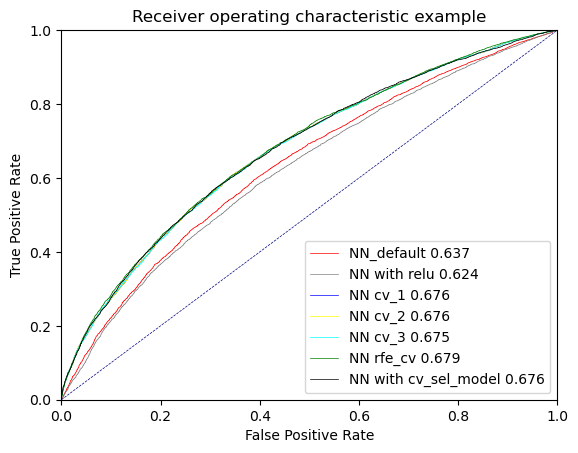

In [62]:
import matplotlib.pyplot as plt

plt.plot(fpr_nn_1, tpr_nn_1, label='NN_default {:.3f}'.format(roc_index_nn_1), color='red', lw=0.5)
plt.plot(fpr_nn_2, tpr_nn_2, label='NN with relu {:.3f}'.format(roc_index_nn_2), color='gray', lw=0.5)
plt.plot(fpr_cv_1, tpr_cv_1, label='NN cv_1 {:.3f}'.format(roc_index_cv_1), color='blue', lw=0.5)
plt.plot(fpr_cv_2, tpr_cv_2, label='NN cv_2 {:.3f}'.format(roc_index_cv_2), color='yellow', lw=0.5)
plt.plot(fpr_cv_3, tpr_cv_3, label='NN cv_3 {:.3f}'.format(roc_index_cv_3), color='cyan', lw=0.5)
plt.plot(fpr_rfe_cv, tpr_rfe_cv, label='NN rfe_cv {:.3f}'.format(roc_index_rfe_cv), color='green', lw=0.5)
plt.plot(fpr_cv_sel_model, tpr_cv_sel_model, label='NN with cv_sel_model {:.3f}'.format(roc_index_cv_sel_model), color='black', lw=0.5)


plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

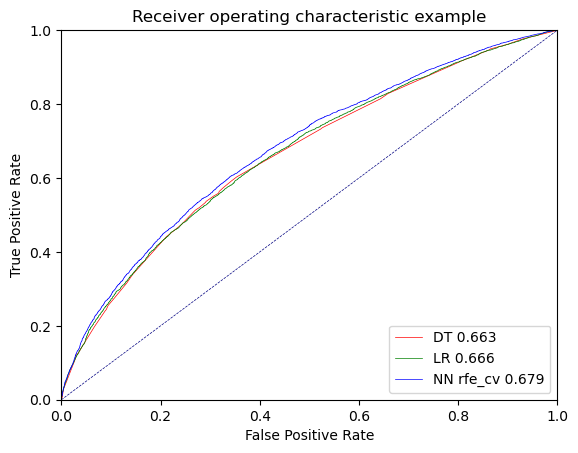

In [63]:
import pickle
with open('DT.pickle', 'rb') as f:
    dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv = pickle.load(f)
with open('LR.pickle', 'rb') as f:
    lr_best,roc_index_lr_cv, fpr_lr_cv, tpr_lr_cv = pickle.load(f)   
    

plt.plot(fpr_dt_cv, tpr_dt_cv, label='DT {:.3f}'.format(roc_index_dt_cv), color='red', lw=0.5)
plt.plot(fpr_lr_cv, tpr_lr_cv, label='LR {:.3f}'.format(roc_index_lr_cv), color='green', lw=0.5)
plt.plot(fpr_rfe_cv, tpr_rfe_cv, label='NN rfe_cv {:.3f}'.format(roc_index_rfe_cv), color='blue', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show() 

# Ensemble Modeling

In [64]:
# import the model
from sklearn.ensemble import VotingClassifier

# load the best performing decision tree and logistic regression models that we have saved from last two pracs
import pickle
with open('DT.pickle', 'rb') as f:
    dt_best,roc_index_dt, fpr_dt, tpr_dt = pickle.load(f)
with open('LR.pickle', 'rb') as f:
    lr_best,roc_index_lr, fpr_lr, tpr_lr = pickle.load(f)    

# select the best performing neural network
nn_best = cv_sel_model

# initialise the classifier with 3 different estimators
voting = VotingClassifier(estimators=[('dt', dt_best), ('lr', lr_best), ('nn', nn_best)], voting='soft')

In [65]:
# fit the voting classifier to training data
voting.fit(X_train, y_train)

# evaluate train and test accuracy
print("Ensemble train accuracy:", voting.score(X_train, y_train))
print("Ensemble test accuracy:", voting.score(X_test, y_test))

# evaluate ROC auc score
y_pred_proba_ensemble = voting.predict_proba(X_test)
roc_index_ensemble = roc_auc_score(y_test, y_pred_proba_ensemble[:, 1])
print("ROC score of voting classifier:", roc_index_ensemble)

Ensemble train accuracy: 0.6437542239243073
Ensemble test accuracy: 0.6378449408672799
ROC score of voting classifier: 0.6792669434446057
